<a href="https://colab.research.google.com/github/sharibhumayun/csi2020/blob/main/Voice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [2]:
path = 'https://raw.githubusercontent.com/sharibhumayun/csi2020/main/VoiceMaster.csv'

df = pd.read_csv(path)
df.head()

,S_no,Current_connection,City,Region,Detailed_Nationality,Nationality,Gender,Exact_Age,Provider,Connection,Segment,Performance,Preference,TRIM_Index,Communication,Easy_to_understand_information,Brand_Trust,Proposition,VFM,Sales_Experience,Opt_inout,Activation_of_addon_packages,deactivation_and_renewal_of_addon_packages,Network_Satisfaction,Quality_ofdata_network_coverage_reliability,Data_network_speed,Quality_of_voice_network,Customer_Support,Experience_getting_support_through_contact_center_IVR,Support_through_Mobily_Stores,Support_through_digital_channels,Billing_Payment,Bill_accuracy_clarity,Prepaid_topup,Payment_process,Ability_to_monitor_usage_balance,Unfair_Balance_Deduction,Overcharging_of_bill,Website_performance,Mobileapp_satisfaction,Performance_SNS_Promotions,CES,OSAT,Wave,Balance deduction experience in which service,Over-charging experience in which service,Awareness of mobile app by Mobily,Awareness of mobile app by STC,Awareness of mobile app by Zain,Visit the website,Navigation Experience Website,Experience Of Finding The Information Website,Download the mobile application,MobileAPP_Usability,Ease Of Problem Resolution Using Mobile App Mobile Application,Frequency to Use Mobile App,Activities on Mobile Application,Visit any social networking page,Resolving Queries Problem Resolution Performance of social networking page
0,7,Mobily,JEDDAH,Western,Saudis,Nationals,Female,23.0,Mobily,Prepaid,LV,5.0,4.0,125,0.0,10.0,10.0,10.0,10.0,NaN,10.0,10.0,10.0,10.0,NaN,NaN,10.0,NaN,NaN,NaN,NaN,10.0,NaN,10.0,10.0,10.0,No,NaN,NaN,NaN,NaN,NaN,10,Jan'20,NaN,NaN,Yes,No,No,No,NaN,NaN,No,NaN,NaN,NaN,NaN,No,NaN
1,871,Mobily,JEDDAH,Western,Pakistani,Expat Asians,Male,35.0,Mobily,Prepaid,VLV,5.0,5.0,150,5.0,5.0,NaN,7.0,5.0,NaN,8.0,8.0,10.0,9.0,8.0,8.0,7.0,NaN,NaN,NaN,NaN,10.0,NaN,10.0,10.0,9.0,No,NaN,NaN,NaN,NaN,NaN,10,Jan'20,NaN,NaN,No,No,No,No,NaN,NaN,No,NaN,NaN,NaN,NaN,No,NaN
2,871,Mobily,MAKKAH AL MUKARRAMAH,Western,Indian,Expat Asians,Male,32.0,Mobily,Prepaid,VLV,3.0,3.0,50,5.0,5.0,7.0,3.0,3.0,NaN,NaN,NaN,NaN,7.0,NaN,NaN,7.0,NaN,NaN,NaN,NaN,10.0,NaN,8.0,8.0,10.0,No,NaN,NaN,NaN,NaN,NaN,5,Jan'20,NaN,NaN,No,No,No,No,NaN,NaN,No,NaN,NaN,NaN,NaN,No,NaN
3,2037,Mobily,AR RIYADH,Central,Saudis,Nationals,Male,31.0,Mobily,Postpaid,VHV,2.0,1.0,-25,5.0,8.0,2.0,4.0,5.0,NaN,5.0,8.0,1.0,4.0,3.0,5.0,5.0,4.0,3.0,NaN,6.0,6.0,8.0,NaN,6.0,6.0,NaN,No,5,5,NaN,3.0,5,Jan'20,NaN,NaN,Yes,Yes,No,Yes,5,6,Yes,8,3,NaN,NaN,No,NaN
4,19,Mobily,KHAMIS MUSHAYT,South,Sudani,Expat Arabs,Male,16.0,Mobily,Prepaid,HV,5.0,5.0,150,10.0,10.0,10.0,10.0,10.0,NaN,10.0,10.0,10.0,10.0,NaN,NaN,10.0,NaN,NaN,NaN,NaN,10.0,NaN,10.0,10.0,10.0,No,NaN,NaN,NaN,NaN,NaN,10,Jan'20,NaN,NaN,No,No,No,No,NaN,NaN,No,NaN,NaN,NaN,NaN,No,NaN


In [3]:
df.describe()

,S_no,Exact_Age,Performance,Preference,TRIM_Index,Communication,Easy_to_understand_information,Brand_Trust,Proposition,VFM,Sales_Experience,Opt_inout,Activation_of_addon_packages,deactivation_and_renewal_of_addon_packages,Network_Satisfaction,Quality_ofdata_network_coverage_reliability,Data_network_speed,Quality_of_voice_network,Customer_Support,Experience_getting_support_through_contact_center_IVR,Support_through_Mobily_Stores,Support_through_digital_channels,Billing_Payment,Bill_accuracy_clarity,Prepaid_topup,Payment_process,Ability_to_monitor_usage_balance,CES,OSAT
count,23407.000000,23352.000000,23322.000000,22924.000000,23407.000000,22366.000000,22182.000000,22862.000000,22866.000000,22882.000000,750.000000,22588.000000,22170.000000,21709.000000,23309.000000,9440.000000,9433.000000,23345.000000,7550.000000,3909.000000,1779.000000,4054.000000,22766.000000,8587.000000,15118.000000,22077.000000,22594.000000,7660.000000,23407.000000
mean,1429.785192,33.716470,3.876940,3.714448,88.729867,7.754270,8.125237,8.258551,7.880040,7.633904,8.385333,8.170444,8.249977,8.217882,7.904071,7.224576,7.319199,8.445192,8.559735,7.437452,8.179314,8.138382,7.973557,7.805171,9.071835,8.830231,8.355404,8.024543,8.002264
std,2024.877059,10.386101,1.127687,1.215669,52.437566,2.768152,2.474523,2.435383,2.670538,2.875171,2.460269,2.503283,2.415691,2.575052,2.655330,2.930597,2.917946,2.308369,2.406183,3.204876,2.677637,2.515158,2.694049,2.884593,1.846099,2.005154,2.359176,2.882370,2.506549
min,6.000000,15.000000,1.000000,1.000000,-50.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,26.000000,3.000000,3.000000,50.000000,6.000000,7.000000,7.000000,7.000000,6.000000,8.000000,7.000000,7.000000,7.000000,7.000000,5.000000,5.000000,8.000000,8.000000,6.000000,7.000000,7.000000,7.000000,7.000000,9.000000,8.000000,8.000000,7.000000,7.000000
50%,135.000000,32.000000,4.000000,4.000000,100.000000,9.000000,9.000000,9.000000,9.000000,9.000000,10.000000,9.000000,9.000000,9.000000,9.000000,8.000000,8.000000,10.000000,10.000000,9.000000,10.000000,9.000000,9.000000,9.000000,10.000000,10.000000,9.000000,10.000000,9.000000
75%,2037.000000,40.000000,5.000000,5.000000,125.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
max,9025.000000,99.000000,5.000000,5.000000,150.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000


In [4]:
df.shape

(23407, 59)

In [5]:
df.columns

Index(['S_no', 'Current_connection', 'City', 'Region', 'Detailed_Nationality',
       'Nationality', 'Gender', 'Exact_Age', 'Provider', 'Connection',
       'Segment', 'Performance', 'Preference', 'TRIM_Index', 'Communication',
       'Easy_to_understand_information', 'Brand_Trust', 'Proposition', 'VFM',
       'Sales_Experience', 'Opt_inout', 'Activation_of_addon_packages',
       'deactivation_and_renewal_of_addon_packages', 'Network_Satisfaction',
       'Quality_ofdata_network_coverage_reliability', 'Data_network_speed',
       'Quality_of_voice_network', 'Customer_Support',
       'Experience_getting_support_through_contact_center_IVR',
       'Support_through_Mobily_Stores', 'Support_through_digital_channels',
       'Billing_Payment', 'Bill_accuracy_clarity', 'Prepaid_topup',
       'Payment_process', 'Ability_to_monitor_usage_balance',
       'Unfair_Balance_Deduction', 'Overcharging_of_bill',
       'Website_performance', 'Mobileapp_satisfaction',
       'Performance_SNS_Promo

In [6]:
df.isnull().sum()

S_no                                                                              0
Current_connection                                                                0
City                                                                              0
Region                                                                            0
Detailed_Nationality                                                              0
Nationality                                                                       0
Gender                                                                            0
Exact_Age                                                                        55
Provider                                                                          0
Connection                                                                        0
Segment                                                                           0
Performance                                                                 

In [18]:
df.isnull().sum().sum()

406033

In [17]:
df.dtypes

S_no                                                                            int64
Current_connection                                                             object
City                                                                           object
Region                                                                         object
Detailed_Nationality                                                           object
Nationality                                                                    object
Gender                                                                         object
Exact_Age                                                                     float64
Provider                                                                       object
Connection                                                                     object
Segment                                                                        object
Performance                                           

In [30]:

df = df.drop('Current_connection', axis = 1)

In [32]:
df = df.drop('City', axis =1)


In [39]:
df.columns

Index(['Region', 'Nationality', 'Gender', 'Exact_Age', 'Provider',
       'Connection', 'Segment', 'Performance', 'Preference', 'TRIM_Index',
       'Communication', 'Easy_to_understand_information', 'Brand_Trust',
       'Proposition', 'VFM', 'Sales_Experience', 'Opt_inout',
       'Activation_of_addon_packages',
       'deactivation_and_renewal_of_addon_packages', 'Network_Satisfaction',
       'Quality_ofdata_network_coverage_reliability', 'Data_network_speed',
       'Quality_of_voice_network', 'Customer_Support',
       'Experience_getting_support_through_contact_center_IVR',
       'Support_through_Mobily_Stores', 'Support_through_digital_channels',
       'Billing_Payment', 'Bill_accuracy_clarity', 'Prepaid_topup',
       'Payment_process', 'Ability_to_monitor_usage_balance',
       'Unfair_Balance_Deduction', 'Overcharging_of_bill',
       'Website_performance', 'Mobileapp_satisfaction',
       'Performance_SNS_Promotions', 'CES', 'OSAT',
       'Balance deduction experience in

In [27]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
print('Gender: ', df['Gender'].unique())
df['Gender'] = le.fit_transform(df['Gender'])
print('Gender: ', df['Gender'].unique())
print('')

Gender:  ['Female' 'Male']
Gender:  [0 1]



In [40]:
print('Region: ', df['Region'].unique())
df['Region'] = le.fit_transform(df['Region'])
print('Region: ', df['Region'].unique())
print('')

print('Nationality: ', df['Nationality'].unique())
df['Nationality'] = le.fit_transform(df['Nationality'])
print('Nationality: ', df['Nationality'].unique())
print('')

Region:  ['Western' 'Central' 'South' 'Others' 'Northern' 'Eastern']
Region:  [5 0 4 3 2 1]

Nationality:  ['Nationals' 'Expat Asians' 'Expat Arabs']
Nationality:  [2 1 0]



In [41]:
print('Provider: ', df['Provider'].unique())
df['Provider'] = le.fit_transform(df['Provider'])
print('Provider: ', df['Provider'].unique())
print('')

print('Connection: ', df['Connection'].unique())
df['Connection'] = le.fit_transform(df['Connection'])
print('Connection: ', df['Connection'].unique())
print('')

print('Segment: ', df['Segment'].unique())
df['Segment'] = le.fit_transform(df['Segment'])
print('Segment: ', df['Segment'].unique())
print('')

Provider:  ['Mobily ' 'Lebara ' 'Friendi ' 'Virgin ' 'Jawwy ' 'STC ' 'Zain '
 'Virgin Postpaid']
Provider:  [3 2 0 5 1 4 7 6]

Connection:  [' Prepaid' ' Postpaid' 'Postpaid']
Connection:  [1 0 2]

Segment:  ['LV' 'VLV' 'VHV' 'HV' 'MV']
Segment:  [1 4 3 0 2]



In [42]:
df['Gender'] = df['Gender'].astype('int')
df['Region'] = df['Region'].astype('int')
df['Nationality'] = df['Nationality'].astype('int')
df['Provider'] = df['Provider'].astype('int')
df['Connection'] = df['Connection'].astype('int')
df['Segment'] = df['Segment'].astype('int')

In [45]:
df.dtypes

Region                                                                          int64
Nationality                                                                     int64
Gender                                                                          int64
Exact_Age                                                                     float64
Provider                                                                        int64
Connection                                                                      int64
Segment                                                                         int64
Performance                                                                   float64
Preference                                                                    float64
TRIM_Index                                                                      int64
Communication                                                                 float64
Easy_to_understand_information                        

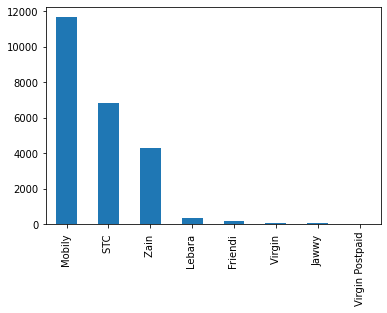

In [7]:
df['Provider'].value_counts().plot.bar()

In [8]:
corrMatrix = df[['Performance', 'Preference', 'TRIM_Index', 'Communication',
        'Brand_Trust', 'Proposition', 'VFM',
       'Sales_Experience', 'Opt_inout', 'Network_Satisfaction',
       'Customer_Support', 'Billing_Payment', 'Bill_accuracy_clarity', 'Prepaid_topup',
       'Website_performance', 'Mobileapp_satisfaction',
       'Performance_SNS_Promotions', 'CES', 'OSAT']].corr()
      

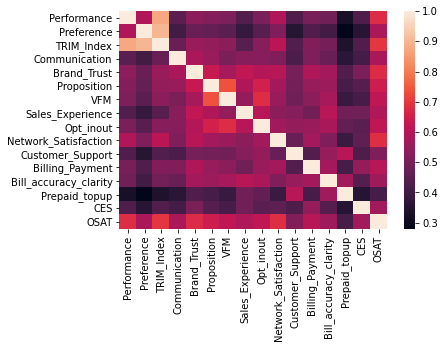

In [9]:
import seaborn as sns
sns.heatmap(corrMatrix)
plt.show()

In [10]:
df = df.drop_duplicates()

In [11]:
df.shape

(23397, 59)

In [12]:
from sklearn.preprocessing import LabelEncoder